# Runmeng Qin

## Research question/interests (initial)

### How effective are SPI ratings as the only predictor of match outcomes in the 2022 World Cup, and how does their accuracy change over the course of the tournament as more teams advance?



#### Each team has SPI ratings for each game,  which are a combination of each team's recent match results and the overall quality of its World Cup roster.  I'd be curious to see how well SPI ratings alone predicted the winner versus the real score, and whether that accuracy improves as more teams advance. 

#### I'm going to do is clean the data(wc_matches.csv) and group separate datasets by game date and team. I will use the columns of 'date', 'team1', 'team2', 'spi1', 'spi2', 'score1', 'score2' as the data basis for my research question. These data should be able to support my research question by comparing the relationship between team, spi and score under different dates.In addition, the potential relationship can be analyzed based on the score and spi ratio between the two teams in each match.

#### SPI is based on goals scored and allowed, not wins, losses and draws. Therefore, through the following analysis, the relationship between pre-match spi and post-match score can be observed. 

In [ ]:
import pandas as pd
df=pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv")
df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.00,2.10
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,0.70,0.68,1.22,1.83,0.00,1.58
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0.33,1.78,0.48,0.95,1.05,1.05
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,1.63,0.15,2.40,0.53,1.05,2.10


In [ ]:
df_use=df[['date','team1','team2','spi1','spi2','score1','score2']]

In [ ]:
df_use.head()

,date,team1,team2,spi1,spi2,score1,score2
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0,2
1,2022-11-21,England,Iran,85.96,62.17,6,2
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0,2
3,2022-11-21,USA,Wales,74.83,65.58,1,1
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,1,2


## Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns

In [ ]:
df_use.shape

(64, 7)

In [ ]:
df_use.describe()

,spi1,spi2,score1,score2
count,64.000000,64.000000,64.000000,64.000000
mean,77.321094,74.295781,1.578125,1.109375
std,11.158028,10.785255,1.551289,1.055856
min,48.160000,48.460000,0.000000,0.000000
25%,68.747500,66.052500,0.000000,0.000000
50%,78.725000,74.460000,1.000000,1.000000
75%,87.232500,79.505000,2.000000,2.000000
max,93.660000,93.480000,7.000000,4.000000


In [ ]:
df_use.dtypes

date       object
team1      object
team2      object
spi1      float64
spi2      float64
score1      int64
score2      int64
dtype: object

In [ ]:
len(df_use['date'].unique())

23

### Group Stage(2022-11-20~2022-12-02)

In [ ]:
#In order to see the spi changes of different schedules of each team more clearly, 
#I will divide it into different dataframe for analysis respectively by the game schedule, and finally combine the analysis.
df_groupStage=df_use[0:48]
df_groupStage.head()
# group stage

,date,team1,team2,spi1,spi2,score1,score2
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0,2
1,2022-11-21,England,Iran,85.96,62.17,6,2
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0,2
3,2022-11-21,USA,Wales,74.83,65.58,1,1
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,1,2


### Round of Sixteen(2022-12-03~2022-12-06)

In [ ]:
df_roundOSixteen=df_use[48:56]
df_roundOSixteen

,date,team1,team2,spi1,spi2,score1,score2
48,2022-12-03,Netherlands,USA,83.97,73.07,3,1
49,2022-12-03,Argentina,Australia,87.98,59.35,2,1
50,2022-12-04,France,Poland,88.57,65.77,3,1
51,2022-12-04,England,Senegal,86.97,75.47,3,0
52,2022-12-05,Japan,Croatia,73.02,79.14,1,1
53,2022-12-05,Brazil,South Korea,92.90,69.40,4,1
54,2022-12-06,Morocco,Spain,74.42,89.20,0,0
55,2022-12-06,Portugal,Switzerland,85.80,78.51,6,1


### QuarterFinals(2022-12-09~2022-12-10)

In [ ]:
df_quarterFinals=df_use[56:60]
df_quarterFinals

,date,team1,team2,spi1,spi2,score1,score2
56,2022-12-09,Croatia,Brazil,78.99,93.47,1,1
57,2022-12-09,Netherlands,Argentina,84.19,87.32,2,2
58,2022-12-10,Morocco,Portugal,74.45,87.92,1,0
59,2022-12-10,England,France,87.59,87.53,1,2


### Semi Final(2022-12-13~2022-12-14)

In [ ]:
df_semifinal=df_use[60:62]
df_semifinal

,date,team1,team2,spi1,spi2,score1,score2
60,2022-12-13,Argentina,Croatia,87.46,79.37,3,0
61,2022-12-14,France,Morocco,87.72,75.13,2,0


### Third Place Match(2022-12-17)

In [ ]:
df_ThirdPlaceMatch=df_use[62:63]
df_ThirdPlaceMatch

,date,team1,team2,spi1,spi2,score1,score2
62,2022-12-17,Croatia,Morocco,77.65,73.92,2,1


### Final(2022-12-18)

In [ ]:
df_final=df_use[63:64]
df_final

,date,team1,team2,spi1,spi2,score1,score2
63,2022-12-18,Argentina,France,88.86,88.41,3,3


Text(0.5, 0.98, 'Correlation between spi1 and score1')

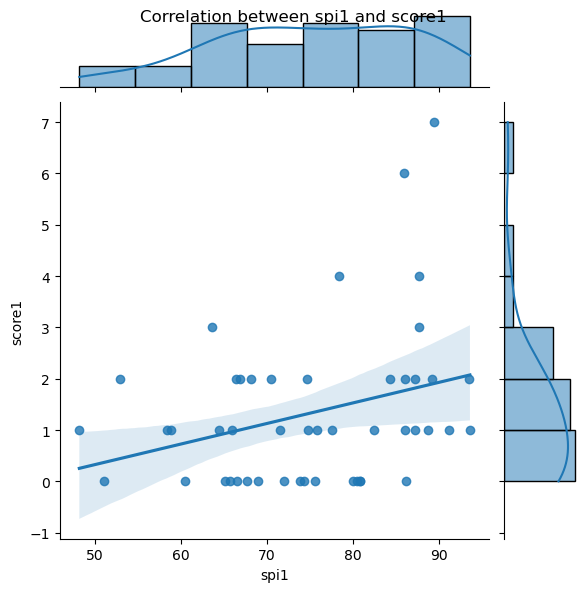

In [ ]:
p=sns.jointplot(x='spi1', y='score1', data=df_groupStage, kind='reg')
p.fig.suptitle("Correlation between spi1 and score1")


Text(0.5, 0.98, 'Correlation between spi2 and score2')

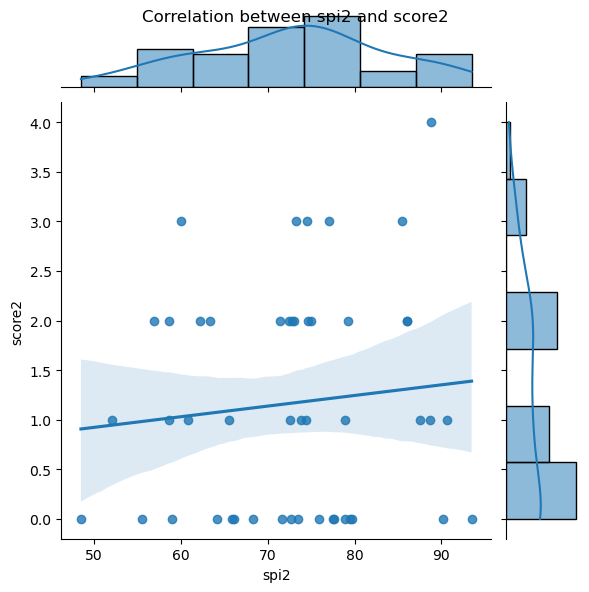

In [ ]:
q=sns.jointplot(x='spi2', y='score2', data=df_groupStage, kind='reg')
q.fig.suptitle("Correlation between spi2 and score2")


#### The two graphs above show that spi is proportional to score.

In [ ]:
groupstageSpi=df_groupStage["spi1"]+df_groupStage["spi2"]
groupstageSpi=sum(groupstageSpi)/(len(df_groupStage)*2)
print(groupstageSpi)

73.95791666666668


In [ ]:
roundOSixteenSpi=df_roundOSixteen["spi1"]+df_roundOSixteen["spi2"]
roundOSixteenSpi=sum(roundOSixteenSpi)/(len(roundOSixteenSpi)*2)
print(roundOSixteenSpi)

78.97125


In [ ]:
quarterFinalspi=df_quarterFinals["spi1"]+df_quarterFinals["spi2"]
quarterFinalspi=sum(quarterFinalspi)/(len(quarterFinalspi)*2)
quarterFinalspi

85.1825

In [ ]:
semifinalspi=df_semifinal["spi1"]+df_semifinal["spi2"]
semifinalspi=sum(semifinalspi)/(len(semifinalspi)*2)
print(semifinalspi)

82.41999999999999


In [ ]:
ThirdPlaceMatchspi=df_ThirdPlaceMatch["spi1"]+df_ThirdPlaceMatch["spi2"]
ThirdPlaceMatchspi=sum(ThirdPlaceMatchspi)/(len(ThirdPlaceMatchspi)*2)
print(ThirdPlaceMatchspi)

75.785


In [ ]:
finalspi=df_final["spi1"]+df_final["spi2"]
finalspi=sum(finalspi)/(len(finalspi)*2)
print(finalspi)

88.63499999999999


In [ ]:
import pandas as pd

In [ ]:
avg_data={'Game Process':['groupstage','round of 16','quarter final','semi final','thitd place match','final'],'average spi':[73.95791666666668
,78.97125,85.1825,82.41999999999999,75.785,88.63499999999999]}
averagespi=pd.DataFrame(avg_data, columns=['Game Process','average spi'])
averagespi

,Game Process,average spi
0,groupstage,73.957917
1,round of 16,78.971250
2,quarter final,85.182500
3,semi final,82.420000
4,thitd place match,75.785000
5,final,88.635000


[Text(0.5, 1.0, 'SPI changes as the game goes on')]

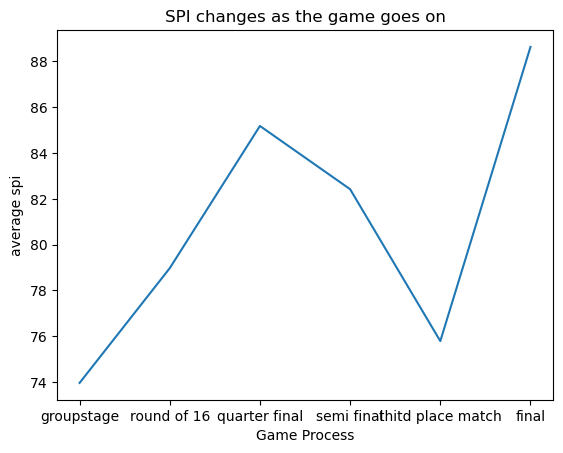

In [ ]:
import seaborn as sns
k=sns.lineplot(data=averagespi, x="Game Process", y="average spi")
k.set(title='SPI changes as the game goes on')

#### The mean value of spi increased with the change of the schedule, but gradually decreased in the semi final and third place march, which may be related to the decrease of spi with the score of the team.
#### Through EDA,  I have a general arrangement of my data and a general understanding of the relationship between columns. I will continue  to further study my research qestion.  It focuses on the relationship between spi and score ratio, and how spi fluctuates with scores.

## Refine your research questions

#### 1. What is the relationship between SPI and Score? How effective are SPI ratings as the only predictor of match outcomes in the 2022 World Cup? 
#### 2. How will SPI change as teams advance or play subsequent tournaments? How does this change relate to scoring?
#### 3. How does their accuracy change over the course of the tournament as more teams advance? 

## Data Pipeline

In [ ]:
import pandas as pd

df=pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv")

avg_data={'Game Process':['groupstage','round of 16','quarter final','semi final','thitd place match','final'],'average spi':[73.95791666666668
,78.97125,85.1825,82.41999999999999,75.785,88.63499999999999]}
averagespi=pd.DataFrame(avg_data, columns=['Game Process','average spi'])

df['spi1-spi2']=df['spi1'] - df['spi2']
df['score1-score2']=df['score1']-df['score2']
df_use=df[['date','team1','team2','spi1','spi2','score1','score2','spi1-spi2','score1-score2']]
df_use.head()


,date,team1,team2,spi1,spi2,score1,score2,spi1-spi2,score1-score2
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0,2,-21.74,-2
1,2022-11-21,England,Iran,85.96,62.17,6,2,23.79,4
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0,2,-12.17,-2
3,2022-11-21,USA,Wales,74.83,65.58,1,1,9.25,0
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,1,2,30.34,-1


## Method Chaining and writing Python programs

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv")

df = (   
    pd.DataFrame(data=data)
    .assign(spi1_spi2=lambda x: x['spi1'] - x['spi2'])
    .assign(score1_score2=lambda x: x['score1'] - x['score2'])
    .assign(ratio=lambda x: x['spi1_spi2'] / x['score1_score2'])
    .loc[:, ['date','team1','team2','spi1','spi2','score1','score2','spi1_spi2','score1_score2','ratio']]
    .reset_index(drop=True)

)


df

,date,team1,team2,spi1,spi2,score1,score2,spi1_spi2,score1_score2,ratio
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0,2,-21.74,-2,10.870000
1,2022-11-21,England,Iran,85.96,62.17,6,2,23.79,4,5.947500
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0,2,-12.17,-2,6.085000
3,2022-11-21,USA,Wales,74.83,65.58,1,1,9.25,0,inf
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,1,2,30.34,-1,-30.340000
...,...,...,...,...,...,...,...,...,...,...
59,2022-12-10,England,France,87.59,87.53,1,2,0.06,-1,-0.060000
60,2022-12-13,Argentina,Croatia,87.46,79.37,3,0,8.09,3,2.696667
61,2022-12-14,France,Morocco,87.72,75.13,2,0,12.59,2,6.295000
62,2022-12-17,Croatia,Morocco,77.65,73.92,2,1,3.73,1,3.730000


In [ ]:
import pandas as pd

def load_and_process(url):
    data = pd.read_csv(url)
    df = (
        pd.DataFrame(data=data)
        .assign(spi1_spi2=lambda x: x['spi1'] - x['spi2'])
        .assign(score1_score2=lambda x: x['score1'] - x['score2'])
        .assign(ratio=lambda x: x['spi1_spi2'] / x['score1_score2'])
        .loc[:, ['date','team1','team2','spi1','spi2','score1','score2','spi1_spi2','score1_score2','ratio']]
        .reset_index(drop=True)
    )
    return df


In [ ]:
df

,date,team1,team2,spi1,spi2,score1,score2,spi1_spi2,score1_score2,ratio
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0,2,-21.74,-2,10.870000
1,2022-11-21,England,Iran,85.96,62.17,6,2,23.79,4,5.947500
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0,2,-12.17,-2,6.085000
3,2022-11-21,USA,Wales,74.83,65.58,1,1,9.25,0,inf
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,1,2,30.34,-1,-30.340000
...,...,...,...,...,...,...,...,...,...,...
59,2022-12-10,England,France,87.59,87.53,1,2,0.06,-1,-0.060000
60,2022-12-13,Argentina,Croatia,87.46,79.37,3,0,8.09,3,2.696667
61,2022-12-14,France,Morocco,87.72,75.13,2,0,12.59,2,6.295000
62,2022-12-17,Croatia,Morocco,77.65,73.92,2,1,3.73,1,3.730000


In [ ]:
df.to_csv('project_runmeng_data.csv', index=False)

## Conduct your analysis to help answer your research question(s)

#### 1. What is the relationship between SPI and Score? How effective are SPI ratings as the only predictor of match outcomes in the 2022 World Cup?

[Text(0.5, 1.0, 'Correlation between spi and score')]

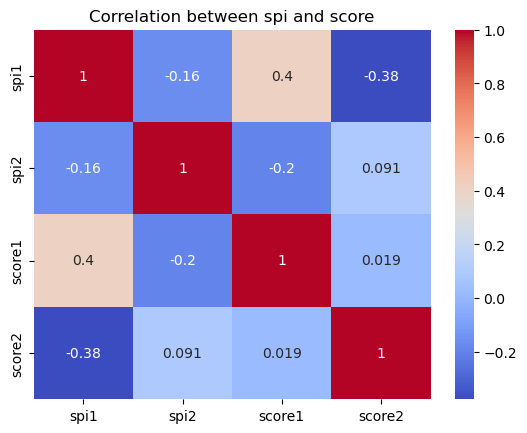

In [ ]:
import seaborn as sns
dfgra=df[['spi1','spi2','score1','score2']].corr()
plot=sns.heatmap(dfgra, annot=True, cmap='coolwarm')
plot.set(title="Correlation between spi and score")

[Text(0.5, 1.0, 'density of the ratio')]

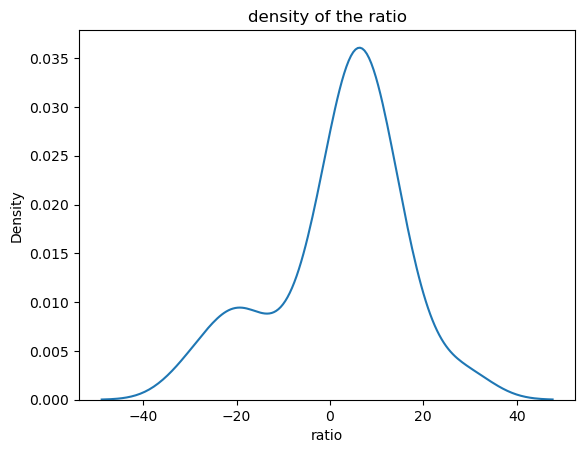

In [ ]:

plot=sns.kdeplot(df['ratio'])
plot.set(title="density of the ratio")

In [ ]:
positive_count = (df['ratio'] > 0).sum()
positive_count

43

In [ ]:
Accuracy_rate=positive_count/len(df)
Accuracy_rate

0.671875

#### It can be seen from hearmap that spi has a positive correlation with the corresponding score, and often the team with a high spi is more likely to get scores or win games. You can see from kdeplot that teams with high spi are more likely to win games than lose them. After calculating the positive and negative ratio of "ratio", it is found that the correct rate of using spi to predict the winning and losing of the match is 67.19%.

#### 2. How will SPI change as teams advance or play subsequent tournaments? How does this change relate to scoring?

In [ ]:
argentina_rows = df[(df['team1'] == 'Argentina') | (df['team2'] == 'Argentina')]
argentina_rows


,date,team1,team2,spi1,spi2,score1,score2,spi1_spi2,score1_score2,ratio
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,1,2,30.34,-1,-30.340000
23,2022-11-26,Argentina,Mexico,86.09,73.48,2,0,12.61,2,6.305000
38,2022-11-30,Poland,Argentina,68.95,86.03,0,2,-17.08,-2,8.540000
49,2022-12-03,Argentina,Australia,87.98,59.35,2,1,28.63,1,28.630000
57,2022-12-09,Netherlands,Argentina,84.19,87.32,2,2,-3.13,0,-inf
60,2022-12-13,Argentina,Croatia,87.46,79.37,3,0,8.09,3,2.696667
63,2022-12-18,Argentina,France,88.86,88.41,3,3,0.45,0,inf


In [ ]:
df.to_csv('argentina_runmeng_data.csv', index=False)


#### Take Argentina as an example. After losing the first match in the group stage, Argentina's spi score dropped by only one point. After winning a match, the spi score also increased by about one point and accumulated with successive wins. The correlation between increased or decreased spi score and score is not obvious, because the change in spi is about one point regardless of win or loss.



#### 3. How does their accuracy change over the course of the tournament as more teams advance? 


In [ ]:
df_after=df[56:]
df_after

,date,team1,team2,spi1,spi2,score1,score2,spi1_spi2,score1_score2,ratio
56,2022-12-09,Croatia,Brazil,78.99,93.47,1,1,-14.48,0,-inf
57,2022-12-09,Netherlands,Argentina,84.19,87.32,2,2,-3.13,0,-inf
58,2022-12-10,Morocco,Portugal,74.45,87.92,1,0,-13.47,1,-13.470000
59,2022-12-10,England,France,87.59,87.53,1,2,0.06,-1,-0.060000
60,2022-12-13,Argentina,Croatia,87.46,79.37,3,0,8.09,3,2.696667
61,2022-12-14,France,Morocco,87.72,75.13,2,0,12.59,2,6.295000
62,2022-12-17,Croatia,Morocco,77.65,73.92,2,1,3.73,1,3.730000
63,2022-12-18,Argentina,France,88.86,88.41,3,3,0.45,0,inf


In [ ]:
positive_count_after = (df_after['ratio'] > 0).sum()
positive_count_after 

4

In [ ]:
Accuracy_rate_after=positive_count_after/len(df[56:])
Accuracy_rate_after

0.5

In [ ]:
df_group=df[:56]
positive_count_group = (df_group['ratio'] > 0).sum()
positive_count_group

39

In [ ]:
Accuracy_rate_group=positive_count_group/len(df[:56])
Accuracy_rate_group

0.6964285714285714

#### As the game progressed, the team with the highest spi from the group stage won the game 50 percent of the time, whereas at the group stage, the team with the highest spi won the game 69.6 percent of the time, close to 70 percent. So, as matches go on and teams advance, spi's accuracy in predicting winning matches decreases.